## Home Prices Report

This notebook analyzes home price data.

In [109]:
import datetime
from dateutil.relativedelta import relativedelta
from pyfredapi import FredSeries
from rich import print as rprint
import pandas as pd
import plotly.express as px
from utils.state_abb import state_abb
from utils.pandas_utils import get_dates, calc_pct_chg, display_pct_chg_df
from utils.pyfredapi import SeriesCollection
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from rich import print as rprint

In [2]:
state_home_price_index_series = [f"{abb}STHPI" for abb in state_abb.values()]

case_shiller_series = [
    "CSUSHPISA",
    "SPCS20RSA",
    "SFXRSA",
    "LXXRSA",
    "SDXRSA",
    "NYXRSA",
    "CHXRSA",
    "SEXRSA",
    "BOXRSA",
    "PHXRSA",
    "MIXRSA",
    "DNXRSA",
    "DAXRSA",
    "WDXRSA",
    "ATXRSA",
    "LVXRSA",
    "POXRSA",
    "TPXRSA",
    "CRXRSA",
    "MNXRSA",
    "DEXRSA",
    "CEXRSA",
]

housing_starts_series = ["HOUST", "HOUST1F", "HOUST2F", "HOUST5F"]
housing_sale_price_series = ["MSPUS", "MSPNHSUS"]
house_supply_series = ["MSACSRNSA"]
mortgage_rate_series = ["MORTGAGE30US", "MORTGAGE15US"]
bond_yield_series = ["WGS10YR", "WGS20YR", "WGS30YR"]
fed_mbs_series = ["WSHOMCB"]
home_ownership_rates_series = ["RHORUSQ156N"]
median_hh_income_series = ["MEHOINUSA672N"]
mortgage_debt_as_perc_of_income_series = ["MDSP"]
fund_funds_rate = ["FEDFUNDS"]

# Calculate the spread on the 30-year mortgage and the 10-year yield

In [ ]:
client = FredSeries()

In [ ]:
home_sale_price_sc = SeriesCollection()
home_sale_price_sc.add_series(series=state_home_price_index_series)

In [ ]:
case_shiller_sc = SeriesCollection()
case_shiller_sc.add_series(series=case_shiller_sc)

In [ ]:
housing_starts_series_sc = SeriesCollection(client=client, series=housing_starts_series)
housing_starts_sc.add_series(series=housing_starts_series)

In [4]:
rates_sc = SeriesCollection()
rates_sc.add_series(series=fund_funds_rate + mortgage_rate_series + bond_yield_series)

Requesting series FEDFUNDS...
Requesting series MORTGAGE30US...
Requesting series MORTGAGE15US...
Requesting series WGS10YR...
Requesting series WGS20YR...
Requesting series WGS30YR...


In [122]:
rates_sc.add_series("WSHOMCB")

Requesting series WSHOMCB...


# Compare 30-year mortgage rate, 10-year treasury rate, and federal funds rate

In [123]:
mort_15year = rates_sc.MORTGAGE15US.data.copy()
mort_30year = rates_sc.MORTGAGE30US.data.copy()
tres_10year = rates_sc.WGS10YR.data.copy()
mort_30year = rates_sc.MORTGAGE30US.data.copy()
fed_funds_rate = rates_sc.FEDFUNDS.data.copy()
mbs = rates_sc.WSHOMCB.data.copy()

### Data munge

In [116]:
# Join the data together based on date
df = pd.merge_asof(left=tres_10year, right=mort_30year, on="date")

df = pd.merge_asof(left=df, right=mort_15year, on="date")

In [117]:
df["spread_10vs30"] = df["MORTGAGE30US"] - df["WGS10YR"]
df["spread_10vs15"] = df["MORTGAGE15US"] - df["WGS10YR"]

### 30-year mortgage vs 10-year treasury rate

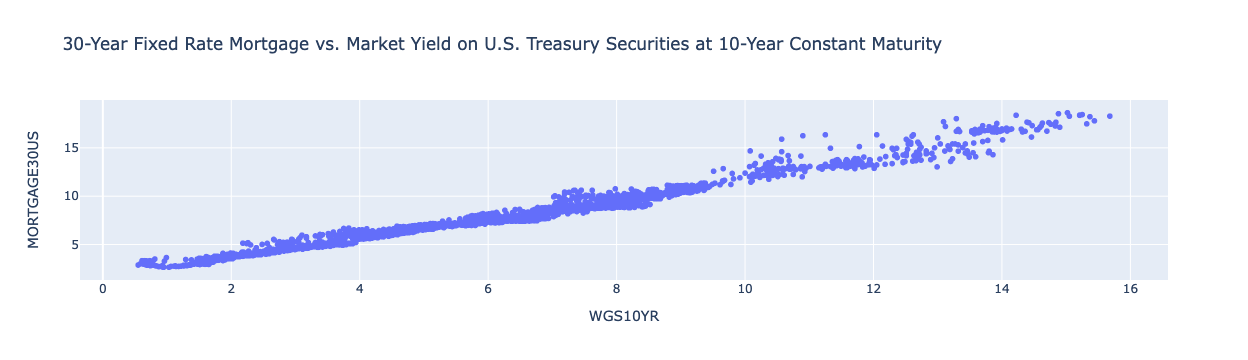

In [40]:
fig = px.scatter(
    df,
    x="WGS10YR",
    y="MORTGAGE30US",
    title="30-Year Fixed Rate Mortgage vs. Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity",
    hover_data={"date": True},
)
# fig.layout.yaxis.tickformat = ",.0%"
# fig.layout.xaxis.tickformat = ",.0%"

fig.show()

In [111]:
model_df = df.dropna()

y = model_df["MORTGAGE30US"]
X = model_df["WGS10YR"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           MORTGAGE30US   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 5.911e+04
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:42:36   Log-Likelihood:                -248.95
No. Observations:                1624   AIC:                             501.9
Df Residuals:                    1622   BIC:                             512.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9957      0.017    118.012      0.0

### 15-year mortgage vs 10-year treasury rate

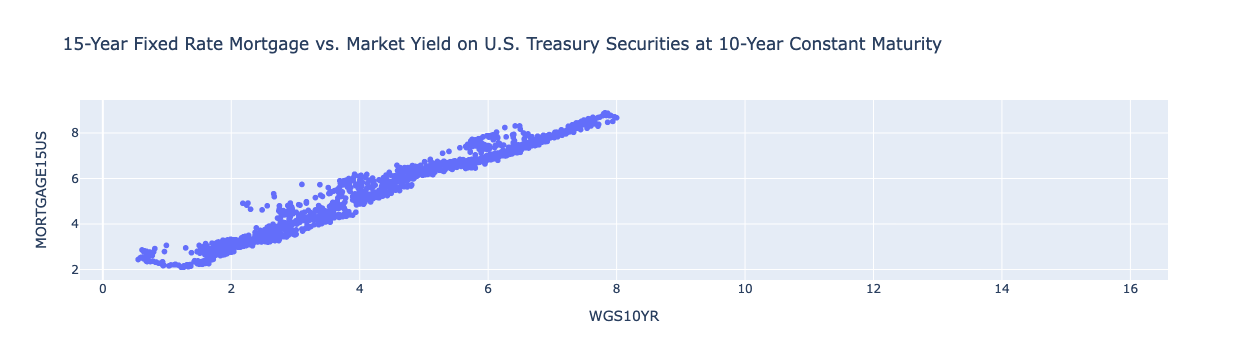

In [120]:
fig = px.scatter(
    df,
    x="WGS10YR",
    y="MORTGAGE15US",
    title="15-Year Fixed Rate Mortgage vs. Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity",
    hover_data={"date": True},
)
# fig.layout.yaxis.tickformat = ",.0%"
# fig.layout.xaxis.tickformat = ",.0%"

fig.show()

In [108]:
model_df = df.dropna()

y = model_df["MORTGAGE15US"]
X = model_df["WGS10YR"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           MORTGAGE15US   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 4.241e+04
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:41:39   Log-Likelihood:                -610.92
No. Observations:                1624   AIC:                             1226.
Df Residuals:                    1622   BIC:                             1237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2222      0.021     57.830      0.0

### Distribution of spreads

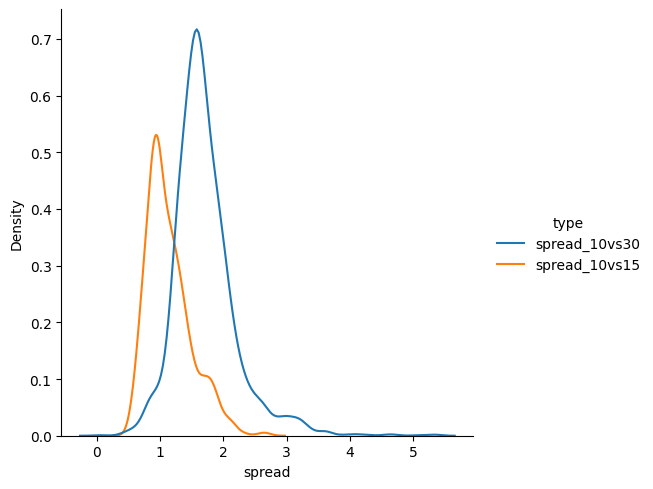

In [ ]:
df1 = df[["date", "spread_10vs30"]]
df1 = df1.rename(columns={"spread_10vs30": "spread"})
df1["type"] = "spread_10vs30"

df2 = df[["date", "spread_10vs15"]]
df2 = df2.rename(columns={"spread_10vs15": "spread"})
df2["type"] = "spread_10vs15"

plt_df = pd.concat([df1, df2], axis=0).reset_index()


sns.displot(data=plt_df, x="spread", hue="type", kind="kde")

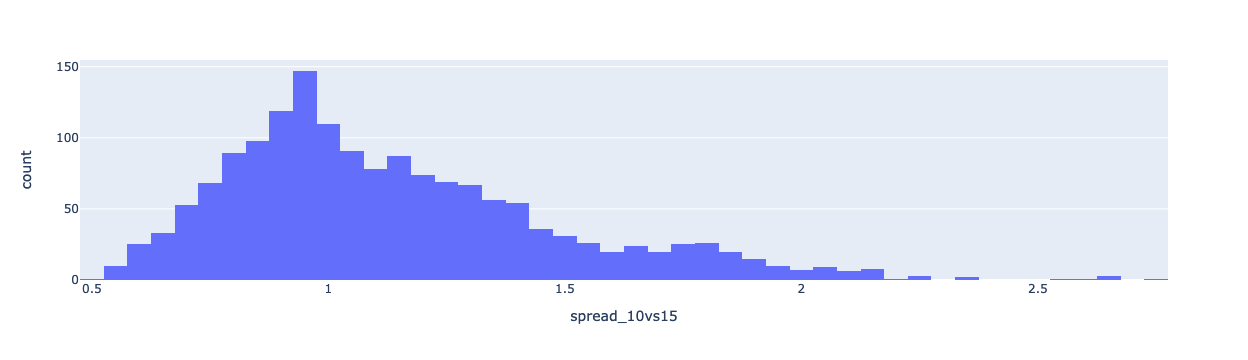

In [88]:
px.histogram(df, x="spread_10vs15")

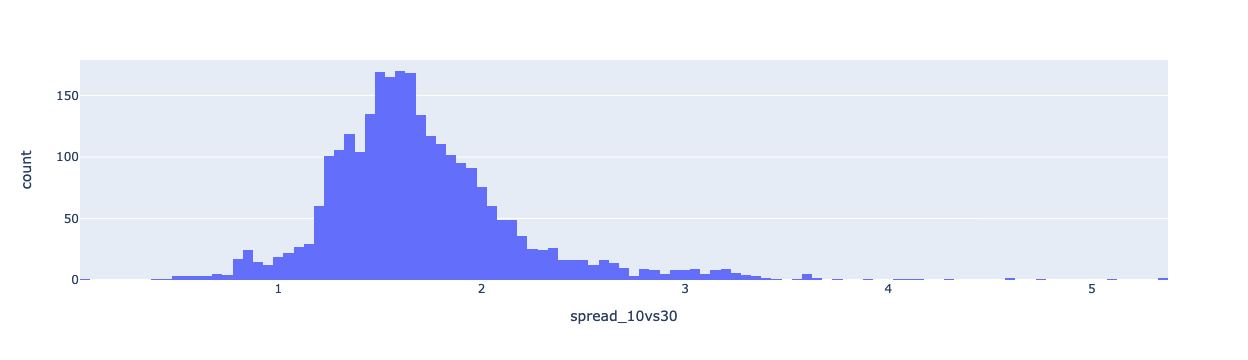

In [42]:
px.histogram(df, x="spread_10vs30")

## MBS vs 30-year mortgage rate

In [154]:
# Join the data together based on date
df = pd.merge_asof(
    left=rates_sc.WSHOMCB.data, right=rates_sc.MORTGAGE30US.data, on="date"
)

In [136]:
df.corr()

/var/folders/5y/m5wvct_x0l18j8tw6qf011s40000gn/T/ipykernel_7413/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,WSHOMCB,MORTGAGE30US
WSHOMCB,1.000000,-0.783914
MORTGAGE30US,-0.783914,1.000000


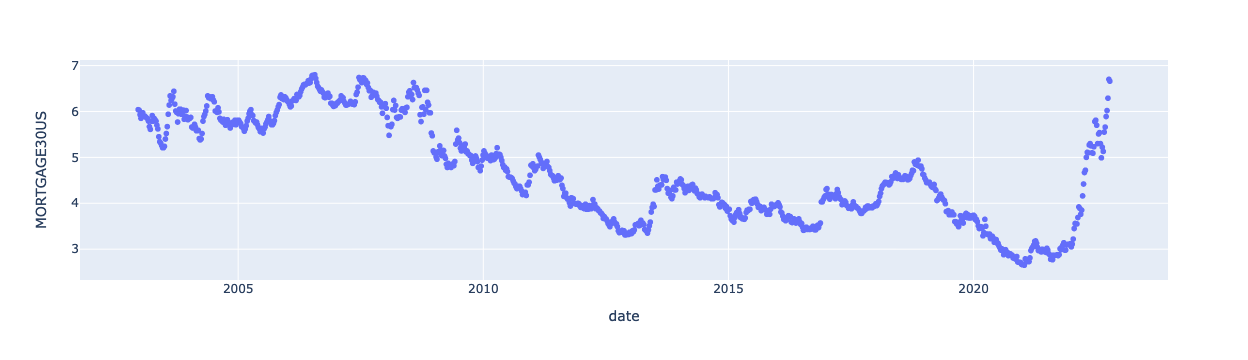

In [135]:
px.scatter(
    df,
    x="date",
    y="MORTGAGE30US",
    title="",
)

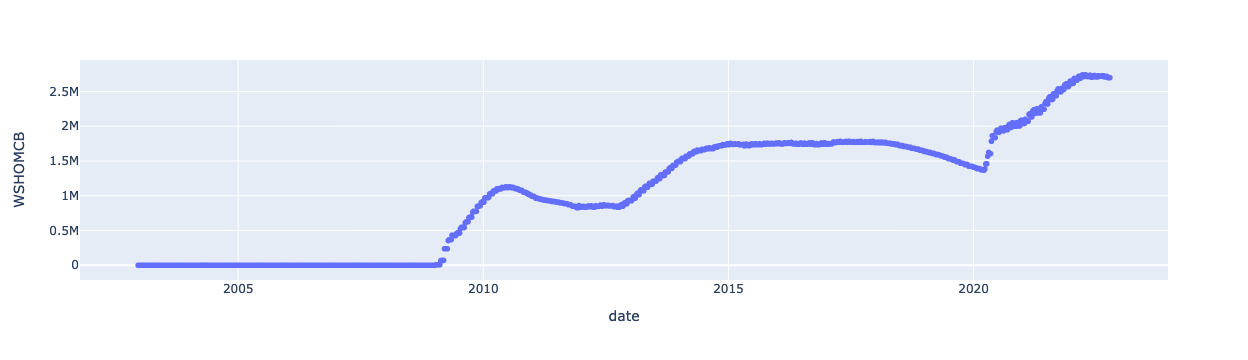

In [134]:
px.scatter(
    df,
    x="date",
    y="WSHOMCB",
    title="",
)

In [158]:
df

,date,WSHOMCB,MORTGAGE30US
0,2002-12-18,0.0,6.04
1,2002-12-25,0.0,6.03
2,2003-01-01,0.0,5.93
3,2003-01-08,0.0,5.85
4,2003-01-15,0.0,5.95
...,...,...,...
1030,2022-09-14,2718526.0,5.89
1031,2022-09-21,2714887.0,6.02
1032,2022-09-28,2698158.0,6.29
1033,2022-10-05,2698158.0,6.70


In [169]:
import altair as alt

base = alt.Chart(df).encode(alt.X("date:T", axis=alt.Axis(title=None)))

line = base.mark_line().encode(
    alt.Y(
        "WSHOMCB",
        axis=alt.Axis(title=rates_sc.WSHOMCB.info.title, titleColor="#57A44C"),
    ),
)

line2 = base.mark_line().encode(
    alt.Y(
        "MORTGAGE30US",
        axis=alt.Axis(title=rates_sc.MORTGAGE30US.info.title, titleColor="#5276A7"),
    ),
    alt.Y2("MORTGAGE30US"),
)

alt.Y2

alt.layer(line, line2).resolve_scale(y="independent")

alt.LayerChart(...)

### Scratch

In [ ]:
home_sale_price_response = {s: client.get_series(s) for s in housing_starts_series}

In [ ]:
home_sale_price_response["HOUST"].info.units

In [ ]:
home_sale_price_response["HOUST"].data

In [ ]:
housing_sale_price_series_response = {
    s: client.get_series(s) for s in housing_sale_price_series
}

In [ ]:
housing_sale_price_series_response["MSPUS"].info.title

In [ ]:
mortgage_rate_series_responses = {s: client.get_series(s) for s in mortgage_rate_series}

In [ ]:
mortgage_rate_series_responses["MORTGAGE30US"].data.dtypes

## Collect home price data

# Median Sale Price

# Housing Starts

In [ ]:
housing_starts_response = {s: client.get_series(s) for s in housing_starts_series}

# State House Price Index

In [ ]:
state_hp_responses = {s: client.get_series(s) for s in state_home_price_index_series}

### Munge the data

In [ ]:
state_hp_dfs = []
state_hp_wide_dfs = []

for s in state_home_price_index_series:
    state_name = state_hp_responses[s].info.title.replace(
        "All-Transactions House Price Index for ", ""
    )

    df = (
        state_hp_responses[s]
        .data.drop(["realtime_start", "realtime_end"], axis=1)
        .copy()
    )
    df["state"] = state_name
    state_hp_dfs.append(df)

    wide_df = (
        state_hp_responses[s]
        .data.drop(["realtime_start", "realtime_end"], axis=1)
        .copy()
    )
    wide_df = wide_df.rename(columns={"value": state_name}).set_index("date")
    state_hp_wide_dfs.append(wide_df)

state_hp_df = pd.concat(state_hp_dfs, axis=0)
state_hp_wide_df = pd.concat(state_hp_wide_dfs, axis=1)

In [ ]:
state_hp_dates = get_dates(state_hp_df, "date")
rprint(f"Minimum home price date: {state_hp_dates.min}")
rprint(f"Maximum home price date: {state_hp_dates.max}")

### Percent Change Table

In [ ]:
state_hp_pct_chg_df = calc_pct_chg(
    wide_df=state_hp_wide_df.copy(),
    lags=[1, 4, 8],
    max_date=state_hp_dates.max,
    grp_var="State",
    lag_var="Quarters Ago",
    title="State Home Price Index Percent Change from Preceding Quarter",
)

# rprint(f"State Home Price Index Percent Change from Preceding Quarter, {state_hp_dates.max}")
display(state_hp_pct_chg_df)

### Plot

In [ ]:
line_plot = px.line(
    data_frame=state_hp_df,
    x="date",
    y="value",
    color="state",
    title=f"Quarterly Home Price Index by State (Index 1980:Q1=100)",
    labels=dict(value="Home Price Index", date="Date", state="State"),
)

line_plot.show(renderer="notebook")

# Case/Shiller Home Price Index

In [ ]:
cs_responses = {s: client.get_series(s) for s in case_shiller_series}

### Munge the data

In [ ]:
cs_dfs = []
cs_wide_dfs = []

for s in case_shiller_series:
    series_name = (
        cs_responses[s]
        .info.title.replace("S&P/Case-Shiller ", "")
        .replace(" Home Price Index", "")
    )

    df = cs_responses[s].data.drop(["realtime_start", "realtime_end"], axis=1).copy()

    df["series"] = series_name
    cs_dfs.append(df)

    wide_df = (
        cs_responses[s].data.drop(["realtime_start", "realtime_end"], axis=1).copy()
    )
    wide_df = wide_df.rename(columns={"value": series_name}).set_index("date")
    cs_wide_dfs.append(wide_df)

cs_df = pd.concat(cs_dfs)
cs_wide_df = pd.concat(cs_wide_dfs, axis=1)

In [ ]:
cs_dates = get_dates(cs_df, "date")
rprint(f"Minimum home price date: {cs_dates.min}")
rprint(f"Maximum home price date: {cs_dates.max}")

### Percent Change Table

In [ ]:
cs_pct_chg_df = calc_pct_chg(
    wide_df=cs_wide_df.copy().dropna(),
    lags=[1, 3, 6, 12, 18, 24, 36, 48, 60],
    max_date=cs_dates.max,
    grp_var="Series",
    lag_var="Months Ago",
    title="Case/Shiller Index Percent Change from Preceding Quarter",
)

display_pct_chg_df(
    df=cs_pct_chg_df.copy(),
    title="Seasonally Adjusted CPI, Percent Change from Preceding Month",
    max_date=dates.max,
)

display(cs_pct_chg_df)

### Plot

In [ ]:
line_plot = px.line(
    data_frame=cs_df.dropna(),
    x="date",
    y="value",
    color="series",
    title=f"Case/Shiller Home Price Index (Index Jan-2000=100)",
    labels=dict(value="CS Home Price Index", date="Date", series="Series"),
)

line_plot.show(renderer="notebook")